In [ ]:
pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=f9b3afd6d19719e925dae421224b16f1fd2602d6ccfb5f45688dd09746cc585c
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import  pickle
import librosa
from scipy import signal
from glob import glob
import librosa
import soundfile
get_ipython().magic('matplotlib inline')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files
os.listdir(path='/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24'
listOfFiles = getListOfFiles(dirName)
print(len(listOfFiles))
print(listOfFiles)

1449
['/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-01-02-02-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-01-01-01-02-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-02-02-01-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-02-01-01-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-02-01-02-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-03-01-01-02-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-01-01-01-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-02-01-01-02-20.wav', '/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24/Actor_20/03-01-01-01-01-01-20.wav', '/co

In [ ]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

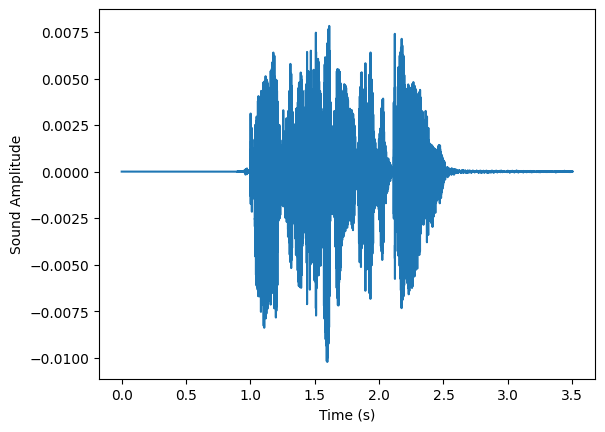

In [ ]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq

    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    break


<ipython-input-7-fb520eed20f4>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate , samples = wavfile.read(listOfFiles[file])


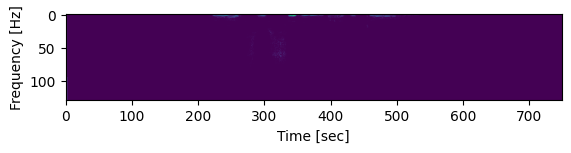

In [ ]:
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate)
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()
     break

In [ ]:
#Double-masking
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
#The clean Audio Files are redirected to Clean Audio Folder Directory
import glob,pickle
for file in tqdm(glob.glob(r'/content/drive/MyDrive/Colab Notebooks/archive/audio_speech_actors_01-24//**//*.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/Project_cleanedData/Cleaned_REVDESS//'+str(file_name), rate=rate,data=signal[mask])

100%|██████████| 1449/1449 [07:49<00:00,  3.08it/s]


In [ ]:
myList = os.listdir('/content/drive/MyDrive/Project_cleanedData/Cleaned_REVDESS')
print(len(myList))
print(myList)

1449
['03-01-05-01-02-02-16.wav', '03-01-05-02-01-01-16.wav', '03-01-05-02-02-01-16.wav', '03-01-05-01-01-02-16.wav', '03-01-04-02-02-02-16.wav', '03-01-04-02-02-01-16.wav', '03-01-06-01-01-02-16.wav', '03-01-05-02-02-02-16.wav', '03-01-05-02-01-02-16.wav', '03-01-06-01-02-01-16.wav', '03-01-06-02-02-02-16.wav', '03-01-07-02-02-01-16.wav', '03-01-06-02-01-02-16.wav', '03-01-07-01-01-02-16.wav', '03-01-07-02-02-02-16.wav', '03-01-07-02-01-02-16.wav', '03-01-08-01-01-01-16.wav', '03-01-07-01-01-01-16.wav', '03-01-07-01-02-02-16.wav', '03-01-07-02-01-01-16.wav', '03-01-06-02-02-01-16.wav', '03-01-06-01-02-02-16.wav', '03-01-07-01-02-01-16.wav', '03-01-06-02-01-01-16.wav', '03-01-08-02-02-01-16.wav', '03-01-08-01-01-02-16.wav', '03-01-08-02-01-02-16.wav', '03-01-08-01-02-01-16.wav', '03-01-08-01-02-02-16.wav', '03-01-08-02-02-02-16.wav', '03-01-08-02-01-01-16.wav', '03-01-02-01-01-01-15.wav', '03-01-01-01-01-02-15.wav', '03-01-01-01-02-01-15.wav', '03-01-01-01-02-02-15.wav', '03-01-01-01-0

In [ ]:
#Feature Extraction of Audio Files Function
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [ ]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on .
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [ ]:
#Load the data and extract features for each sound file
from glob import glob
import os
import glob
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'/content/drive/MyDrive/Project_cleanedData/Cleaned_REVDESS//*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
import librosa
import numpy as np
x_train,x_test,y_trai,y_tes=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_trai),np.shape(y_tes))
y_test_map = np.array(y_tes).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_trai).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

(576, 180) (192, 180) (576, 2) (192, 2)
(576,) (192,)
03-01-07-02-02-02-09.wav
03-01-07-01-01-02-02.wav
03-01-07-02-02-02-22.wav
03-01-02-01-01-01-13.wav
03-01-02-02-02-01-24.wav
03-01-07-01-02-02-06.wav
03-01-02-01-02-02-21.wav
03-01-07-01-01-01-14.wav
03-01-03-02-01-01-04.wav
03-01-06-02-02-02-01.wav
03-01-07-02-01-01-13.wav
03-01-03-01-01-02-01.wav
03-01-07-01-01-01-20.wav
03-01-07-01-01-02-06.wav
03-01-03-01-01-02-09.wav
03-01-02-02-02-02-05.wav
03-01-06-01-02-02-15.wav
03-01-07-01-01-01-23.wav
03-01-06-02-01-02-06.wav
03-01-03-02-01-02-18.wav
03-01-06-01-01-02-11.wav
03-01-03-02-02-02-15.wav
03-01-03-02-02-01-02.wav
03-01-07-02-02-01-14.wav
03-01-07-01-02-02-13.wav
03-01-07-02-02-02-18.wav
03-01-03-02-02-01-07.wav
03-01-03-02-01-02-08.wav
03-01-06-01-02-01-04.wav
03-01-07-02-02-01-02.wav
03-01-07-02-01-01-06.wav
03-01-06-01-02-02-19.wav
03-01-07-02-02-02-19.wav
03-01-02-02-01-01-07.wav
03-01-02-02-02-02-04.wav
03-01-06-02-01-01-12.wav
03-01-07-02-02-01-20.wav
03-01-03-02-02-01-19.

In [ ]:
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Features extracted:", x_train.shape[1])

Training set shape: (576, 180)
Testing set shape: (192, 180)
Features extracted: 180


In [ ]:
#Get the shape of the training and testing datasets
# print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))

(array([-2.90819641e+02,  8.40356598e+01, -3.68039093e+01,  3.01572495e+01,
       -1.23389349e+01, -2.18912086e+01, -4.69425201e+00, -3.46622925e+01,
       -1.24624271e+01, -5.58857203e+00, -2.26222324e+01,  1.18349671e-01,
       -1.44159985e+01, -9.75448227e+00, -1.26557751e+01, -1.17862701e+01,
       -7.61746788e+00, -6.91549587e+00, -1.34061413e+01, -3.40739369e+00,
       -1.40706806e+01, -1.03563776e+01, -7.32750511e+00, -1.02135305e+01,
       -6.57110023e+00,  2.22213674e+00, -1.02271296e-01,  3.32492995e+00,
       -2.71566153e-01,  5.26050255e-02, -5.41558266e+00,  2.62972212e+00,
        6.86722577e-01, -7.66829729e-01, -5.61414909e+00, -1.06935167e+00,
       -8.81156147e-01,  3.18769860e+00, -4.58733130e+00, -2.30528617e+00,
        4.65350211e-01,  5.07471025e-01,  5.09522557e-01,  5.60466349e-01,
        6.49332643e-01,  6.16768003e-01,  5.51072359e-01,  6.19230151e-01,
        6.55318379e-01,  6.19514346e-01,  6.23151600e-01,  5.24772286e-01,
        5.72679783e-05, 

In [ ]:
# Initialize the Multi Layer Perceptron Classifier

model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
print("[*] Training the model...")
model.fit(x_train,y_train)

[*] Training the model...


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_pred=model.predict(x_test)
y_pred

array(['happy', 'disgust', 'disgust', 'calm', 'calm', 'disgust', 'calm',
       'fearful', 'fearful', 'fearful', 'fearful', 'happy', 'disgust',
       'disgust', 'happy', 'calm', 'disgust', 'disgust', 'happy', 'happy',
       'disgust', 'happy', 'happy', 'disgust', 'disgust', 'happy',
       'happy', 'happy', 'fearful', 'disgust', 'fearful', 'fearful',
       'disgust', 'calm', 'calm', 'fearful', 'disgust', 'happy',
       'fearful', 'happy', 'fearful', 'happy', 'fearful', 'happy',
       'happy', 'disgust', 'happy', 'fearful', 'fearful', 'disgust',
       'calm', 'calm', 'calm', 'happy', 'disgust', 'calm', 'happy',
       'happy', 'disgust', 'happy', 'fearful', 'fearful', 'disgust',
       'calm', 'happy', 'happy', 'calm', 'calm', 'happy', 'fearful',
       'happy', 'happy', 'happy', 'calm', 'disgust', 'happy', 'happy',
       'fearful', 'fearful', 'calm', 'happy', 'fearful', 'calm',
       'fearful', 'happy', 'calm', 'fearful', 'disgust', 'happy', 'calm',
       'happy', 'happy', 'fe

In [ ]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 81.77%


In [ ]:
#Store the Prediction probabilities into CSV file
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('predictionfinal.csv')

    predictions                file_names
0         happy  03-01-07-02-02-02-09.wav
1       disgust  03-01-07-01-01-02-02.wav
2       disgust  03-01-07-02-02-02-22.wav
3          calm  03-01-02-01-01-01-13.wav
4          calm  03-01-02-02-02-01-24.wav
..          ...                       ...
187       happy  03-01-03-01-02-01-24.wav
188     fearful  03-01-06-01-01-01-05.wav
189        calm  03-01-07-01-02-01-01.wav
190     fearful  03-01-03-02-02-02-21.wav
191       happy  03-01-06-02-02-01-13.wav

[192 rows x 2 columns]


In [ ]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
0,disgust,happy
1,disgust,disgust
2,disgust,disgust
3,calm,calm
4,calm,calm


In [ ]:
#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:
    Emotion_Voice_Detection_Model = pickle.load(file)

Emotion_Voice_Detection_Model

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.74      0.95      0.83        37
     disgust       0.77      0.65      0.71        46
     fearful       0.80      0.75      0.78        60
       happy       0.76      0.78      0.77        49

    accuracy                           0.77       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.77      0.77      0.77       192



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[35  2  0  0]
 [ 7 30  5  4]
 [ 3  4 45  8]
 [ 2  3  6 38]]


**TESTING THE MODEL**

PREDICTED EMOTION OF INPUT IS: ['calm']
--------GRAPH--------



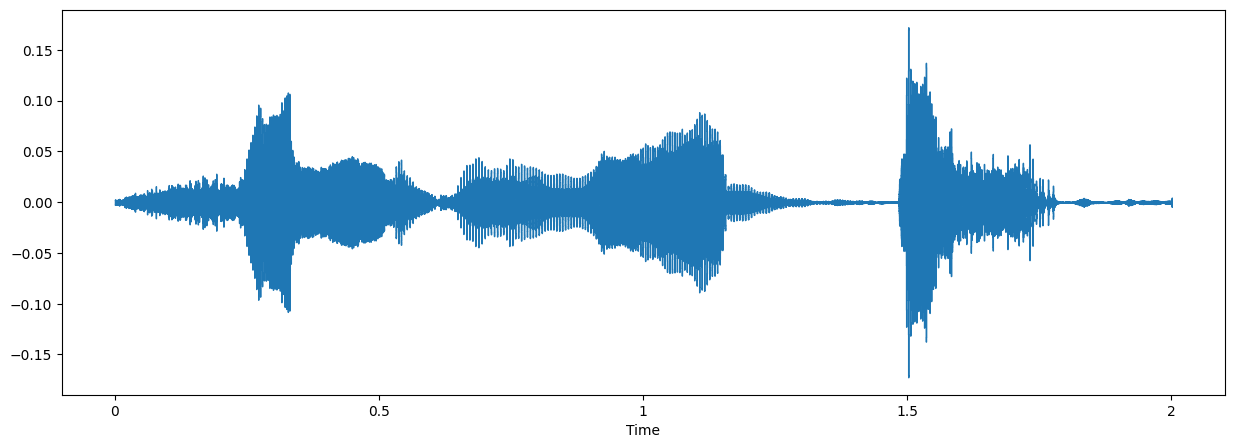

In [ ]:
'''TEST CASE -01 '''

input_file = "/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )

PREDICTED EMOTION OF INPUT IS: ['happy']
--------GRAPH--------



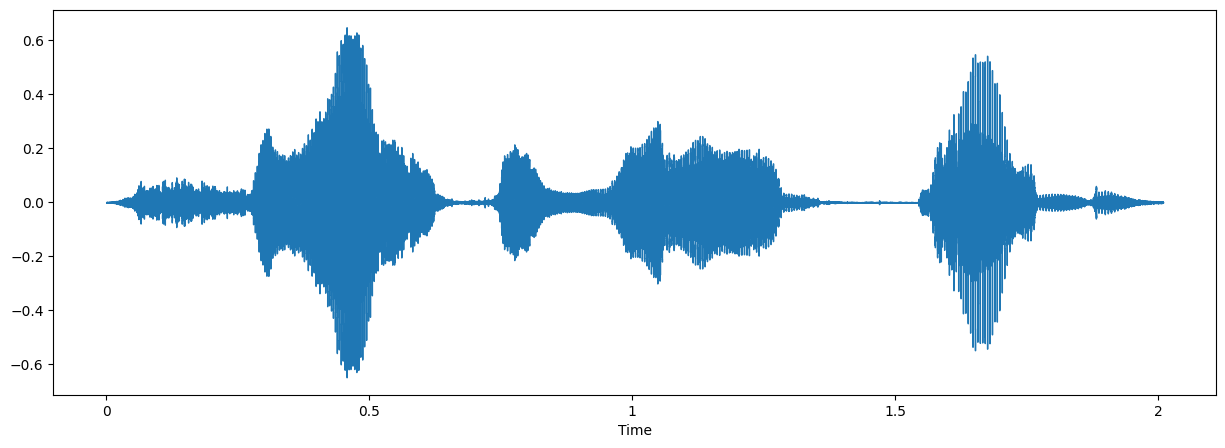

In [ ]:
'''TEST CASE-02'''

input_file = "/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_dead_angry.wav"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )

In [ ]:
'''TESTCASE -03'''

input_file = "/content/drive/MyDrive/Colab Notebooks/output10.wav"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


ValueError: ignored

In [ ]:
#The clean Audio Files are redirected to Clean Audio Folder Directory
import glob,pickle
for file in tqdm(glob.glob(r'/content/drive/MyDrive/Colab Notebooks/output10.wav')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/Project_cleanedData/cleaned_testcase//'+str(file_name), rate=rate,data=signal[mask])

100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


PREDICTED EMOTION OF INPUT IS: ['fearful']
--------GRAPH--------



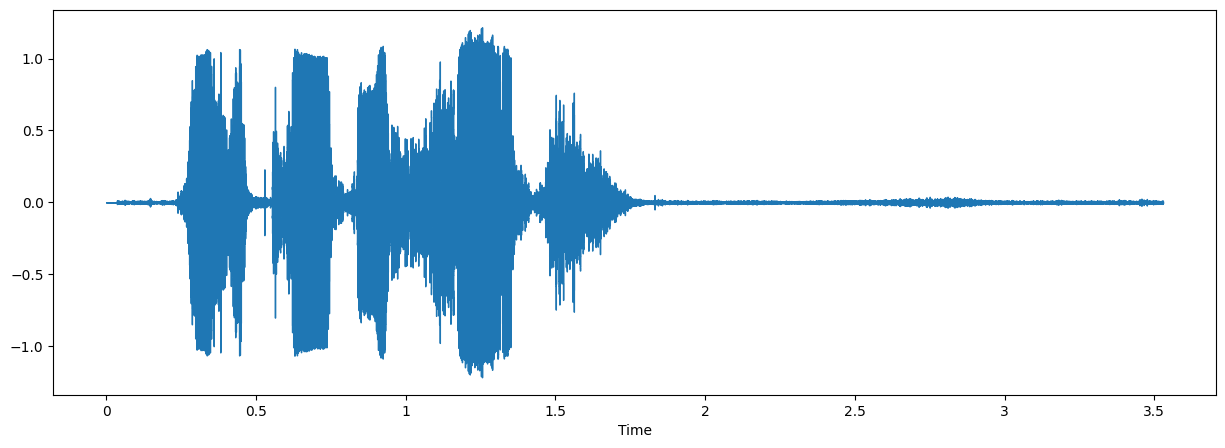

In [ ]:

input_file = "/content/drive/MyDrive/Project_cleanedData/cleaned_testcase/output10.wav"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )

In [ ]:

input_file = "/content/drive/MyDrive/Colab Notebooks/audio.mpeg"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


In [ ]:
#The clean Audio Files are redirected to Clean Audio Folder Directory
import glob,pickle
for file in tqdm(glob.glob(r'/content/drive/MyDrive/Colab Notebooks/audio.mpeg')):
    file_name = os.path.basename(file)
    signal , rate = librosa.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= r'/content/drive/MyDrive/Project_cleanedData/cleaned_testcase//'+str(file_name), rate=rate,data=signal[mask])

100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


PREDICTED EMOTION OF INPUT IS: ['disgust']
--------GRAPH--------



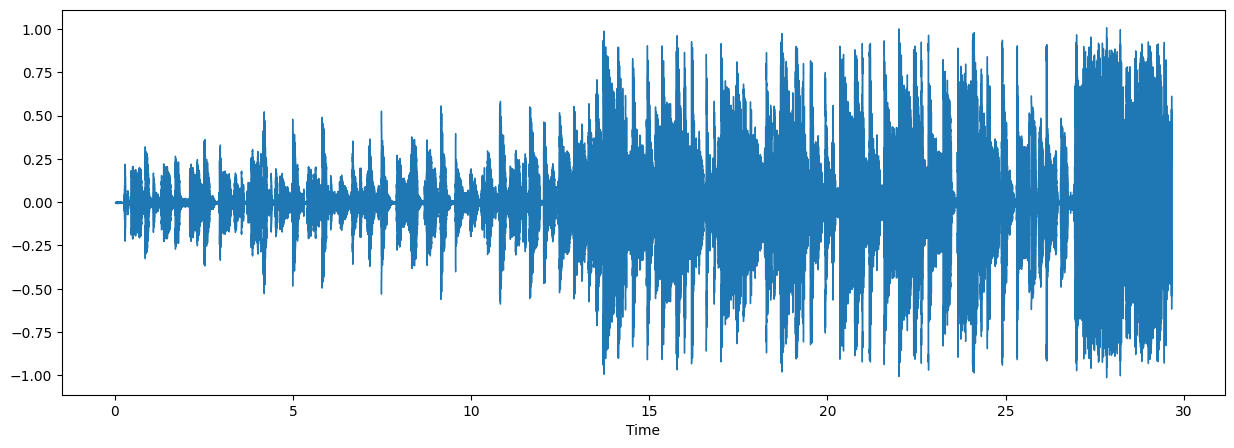

In [ ]:

input_file = "/content/drive/MyDrive/Project_cleanedData/cleaned_testcase/audio.mpeg"
ans , sr = librosa.core.load(input_file)
new_feature = extract_feature(input_file , mfcc=True, chroma=True, mel=True)
ans =[]
ans.append(new_feature)
ans = np.array(ans)

z_pred = Emotion_Voice_Detection_Model.predict(ans)
print("PREDICTED EMOTION OF INPUT IS:",z_pred)
print("--------GRAPH--------")
print()
graph,sampling_rate =  librosa.load(input_file)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(graph,sr=sampling_rate )